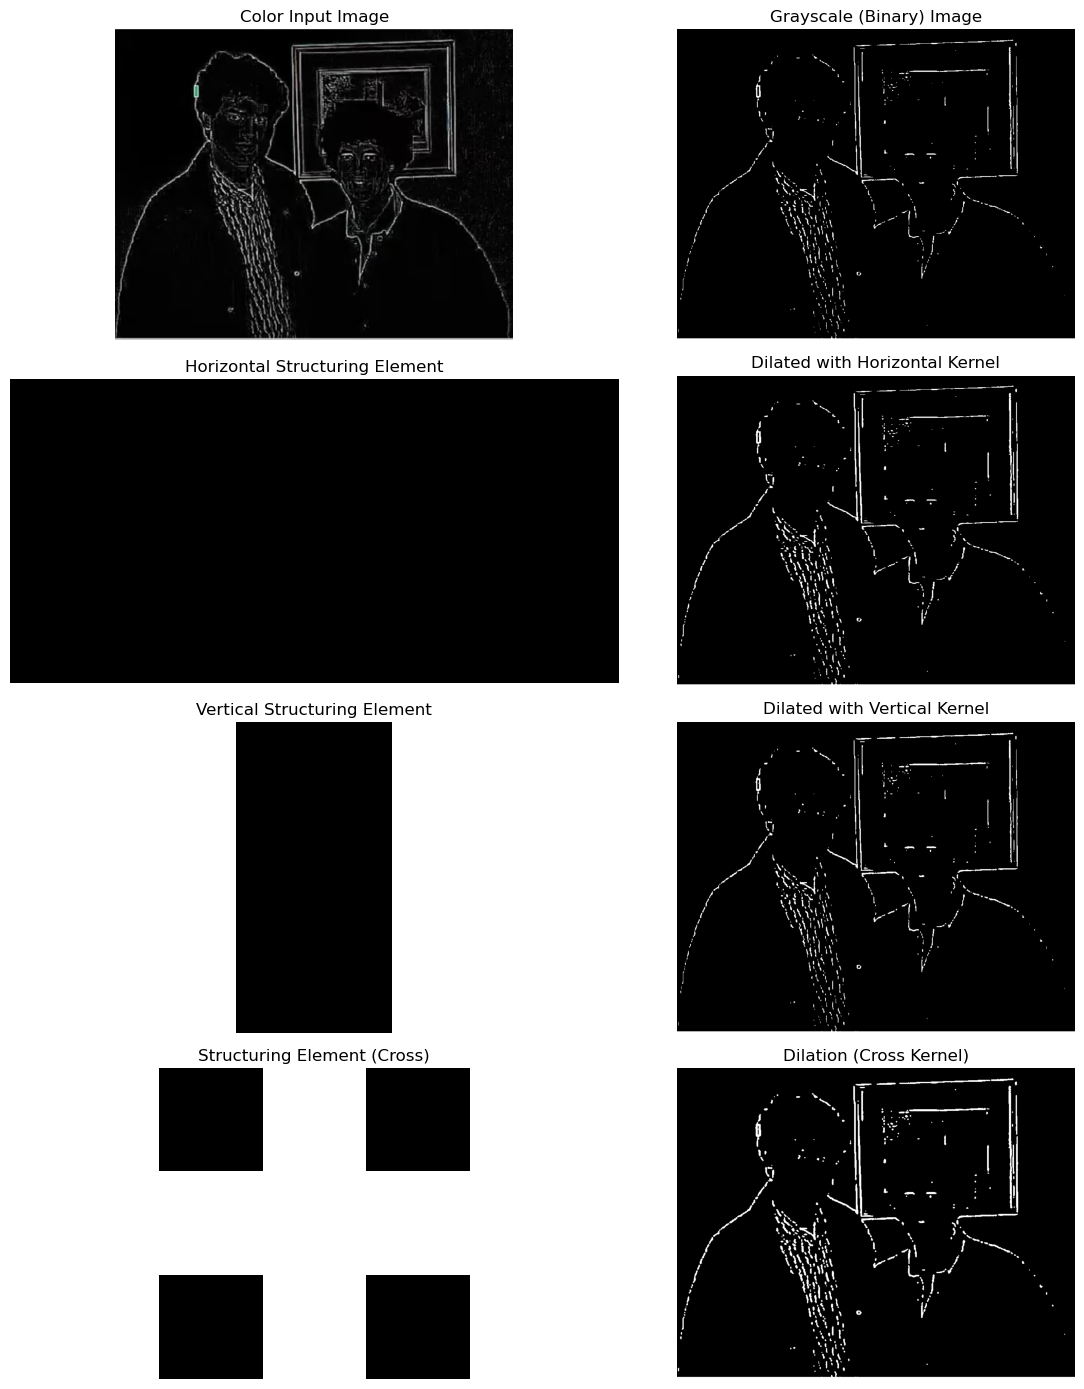

In [28]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# Mathematical Explanation and Theory:
# ----------------------------

# Step 1: Load the original color image
# Image Path - This defines the path where the image is stored, either from local directories or external files
# We use OpenCV's imread() function to load the image and check if it exists.
# If the image does not exist, a FileNotFoundError is raised.
# OpenCV loads the image in BGR format by default (not RGB).

# Step 2: Convert the image to grayscale
# Grayscale conversion simplifies the image and reduces it to a single intensity channel.
# In a grayscale image, each pixel represents the brightness of the corresponding pixel in the original image.
# The color image is transformed to grayscale using the function cv2.cvtColor() with the COLOR_BGR2GRAY flag.
# This is a prerequisite for binary thresholding and morphological operations, which work more effectively on single-channel images.

# Step 2: Thresholding to create a binary image
# Thresholding is a simple image segmentation technique that converts the grayscale image into a binary image:
# - Pixel intensity greater than 127 is converted to 255 (white).
# - Pixel intensity less than or equal to 127 is converted to 0 (black).
# This binary image is useful for morphological operations like dilation or erosion, which are typically performed on binary images.

# Step 2: Define Structuring Elements
# A structuring element is a binary matrix used to probe the image in morphological operations.
# The choice of structuring element affects the operation's result (e.g., dilation or erosion).
# Common structuring elements include:
# - Horizontal kernel: A kernel used to focus on horizontal features.
# - Vertical kernel: A kernel used to focus on vertical features.
# - Cross kernel: A cross-shaped kernel that combines both horizontal and vertical features.

# Step 3: Apply Dilation (or Erosion) with the Structuring Elements
# Dilation is a morphological operation that enlarges white regions (foreground objects) in a binary image.
# It works by applying the structuring element to the image, expanding the boundaries of foreground objects.
# - The operation replaces a pixel with the maximum value in the neighborhood defined by the structuring element.
# Mathematically, dilation is represented as:
#   A ⊕ B = { z | (B)_z ∩ A ≠ ∅ }
#   Where:
#     - A is the input binary image,
#     - B is the structuring element,
#     - (B)_z is the structuring element centered at location z,
#     - The result is the set of points z where the structuring element overlaps with the image A.

# The dilation operation is applied with three different structuring elements (horizontal, vertical, cross), 
# each affecting the image in different ways, depending on the type of features we wish to enhance or emphasize.

# Step 4: Visualization
# In this step, we use Matplotlib to visualize different stages of the image processing pipeline.
# The visualizations help to understand the transformations applied to the image at each stage:
# - The original image (in color).
# - The binary image after thresholding.
# - The structuring elements (horizontal, vertical, cross) used for dilation.
# - The results of dilation with each of the structuring elements.
# This step is essential to visualize how each morphological operation impacts the image.

# ----------------------------

# Load the original color image
image_path = os.path.join(os.getcwd(), 'data', 'images', 'dilation_example.png')
#image_path = os.path.join(os.getcwd(), 'data', 'images', 'color_original.jpg')
#image_path = os.path.join(os.getcwd(), 'data', 'images', 'lena_color.jpg')  # Replace with your image path
#image_path = os.path.join(os.getcwd(), 'data', 'images', 'roses.jpg') 

# Check if the image exists and load it using OpenCV
image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError(f"Image not found at path: {image_path}")

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold the grayscale image to create a binary version
_, T_binary = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Define Structuring Elements
# Horizontal Structuring Element
horizontal_kernel = np.array([[1, 1]], dtype=np.uint8)

# Vertical Structuring Element
vertical_kernel = np.array([[1], [1]], dtype=np.uint8)

# Cross Structuring Element
cross_kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8)

# Apply Dilation with the Structuring Elements
dilated_horizontal = cv2.dilate(T_binary, horizontal_kernel, iterations=1)
dilated_vertical = cv2.dilate(T_binary, vertical_kernel, iterations=1)
dilated_cross = cv2.dilate(T_binary, cross_kernel, iterations=1)

# Visualization of results using Matplotlib
plt.figure(figsize=(12, 14))  # Adjusted size to accommodate 4 rows

# First row - Color Input Image and Grayscale (Binary) Image
plt.subplot(4, 2, 1)
plt.title("Color Input Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert to RGB for correct display in Matplotlib
plt.axis('off')

plt.subplot(4, 2, 2)
plt.title("Grayscale (Binary) Image")
plt.imshow(T_binary, cmap='gray')
plt.axis('off')

# Second row - Horizontal Structuring Element and Dilated Image with Horizontal Kernel
plt.subplot(4, 2, 3)
plt.title("Horizontal Structuring Element")
plt.imshow(horizontal_kernel, cmap='gray')
plt.axis('off')

plt.subplot(4, 2, 4)
plt.title("Dilated with Horizontal Kernel")
plt.imshow(dilated_horizontal, cmap='gray')
plt.axis('off')

# Third row - Vertical Structuring Element and Dilated Image with Vertical Kernel
plt.subplot(4, 2, 5)
plt.title("Vertical Structuring Element")
plt.imshow(vertical_kernel, cmap='gray')
plt.axis('off')

plt.subplot(4, 2, 6)
plt.title("Dilated with Vertical Kernel")
plt.imshow(dilated_vertical, cmap='gray')
plt.axis('off')

# Fourth row - Cross Structuring Element and Dilated Image with Cross Kernel
plt.subplot(4, 2, 7)
plt.title("Structuring Element (Cross)")
plt.imshow(cross_kernel, cmap='gray')
plt.axis('off')

plt.subplot(4, 2, 8)
plt.title("Dilation (Cross Kernel)")
plt.imshow(dilated_cross, cmap='gray')
plt.axis('off')

# Adjust layout to prevent overlap of images and titles
plt.tight_layout()
plt.show()
